In [1]:
from qiskit import QuantumCircuit 
from qiskit.quantum_info import Statevector
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from math import sqrt, pi

In [2]:
qc = QuantumCircuit(1,1) # Creates a basic circuit with one one qbit and one digital bit
initial_state = [0,1]   # Define initial_stateas |1>
#also can try out other initial states - remember these are complex numbers. Example:
#initial_state = [1/sqrt(2), 1j/sqrt(2)]
#if length of vector is not one, there will be an error message.
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector(label='statevector', pershot=False, conditional=False)  # Tell simulator to save statevector
# Unless statevector is not specifically saved, it cannot be retrieved
qc.measure([0], [0]) #measure needs to be implemented in this case, otherwise get_counts() will always count zero
qc.draw()  # Let's view our circuit

┌─────────────────┐ ░ ┌─┐
q_0: ┤ Initialize(0,1) ├─░─┤M├
     └─────────────────┘ ░ └╥┘
c: 1/═══════════════════════╩═
                            0

In [3]:
sim = AerSimulator()  # make new simulator object

In [4]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
vector_value = result.get_counts()    # interpret the results as a "counts" dictionary
# Out put will show the result and the number of operations that get this result
# Counts will not be mathematically exact - the measurement is a random process, after all

In [5]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


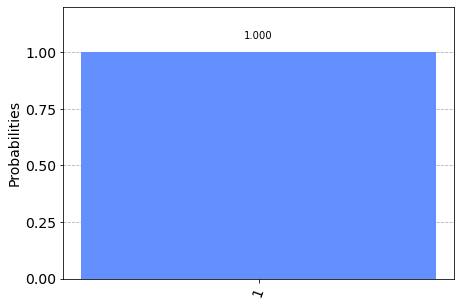

In [6]:
plot_histogram(vector_value)

In [7]:
qc = QuantumCircuit(1,1) # Creates a basic circuit with one one qbit and one digital bit
initial_state = [1,0] 
qc.initialize(initial_state, 0) 

In [8]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
vector_value = result.get_counts() 

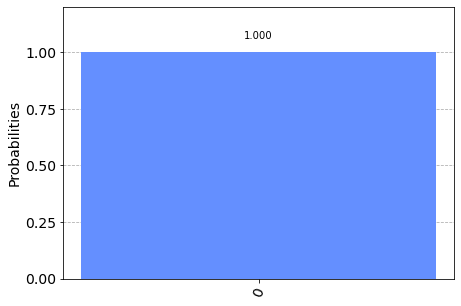

In [9]:
plot_histogram(vector_value)

In [10]:
#Now the output from a hadamard Gate
#qc is 'properly' initialized (i.e. always initialize to zero, then manipulate with gates)
#The Hadamard Gate on the '0' bit creates a [1/sqrt(2), 1/sqrt(2)] state vector 

qc = QuantumCircuit(1,1) # Creates a basic circuit with one one qbit and one digital bit
initial_state = [1,0] 
qc.initialize(initial_state, 0) 


In [11]:
qc.h(0)  #H-transformation onto first (and in this case only) qbit
qc.save_statevector(); #necessary if I want to draw the statevector
qc.measure(0,0)
qc.draw()

┌─────────────────┐┌───┐ ░ ┌─┐
q_0: ┤ Initialize(1,0) ├┤ H ├─░─┤M├
     └─────────────────┘└───┘ ░ └╥┘
c: 1/════════════════════════════╩═
                                 0

In [12]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results

In [13]:
ket = result.get_statevector() 
# Print the statevector neatly:
array_to_latex(ket, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

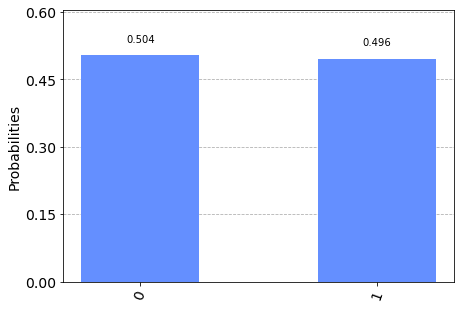

In [14]:
vector_value = result.get_counts()
plot_histogram(vector_value)

In [15]:
#Providing a count of the values - the circuit was run 1024 times (standard setting)
print(vector_value)

{'0': 516, '1': 508}
